# Projet 9 - Produisez une étude de marché avec Python 

# Préparation, nettoyage et analyse exploratoire de données

## 1 - Importation des librairies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 2 - Importation des tables

In [2]:
alim2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
pop2000_2018 = pd.read_csv('Population_2000_2018.csv')

In [3]:
alim2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
pop2000_2018.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


## 3 - Nettoyage de données

### 3.1 - Dataframe "alim2017"

#### 3.1.1 - Info sur le DF

In [5]:
alim2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

#### 3.1.2 - Comptabiliser les valeurs manquantes

In [6]:
alim2017.isnull().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

#### 3.1.3 - Repérer les colonnes ne contenant qu'une valeur unique et les retirer ainsi que les séries non nécessaires

In [7]:
alim2017["Code Domaine"].nunique()

1

In [8]:
alim2017["Domaine"].nunique()

1

In [9]:
alim2017["Code année"].nunique()

1

In [10]:
alim2017["Année"].nunique()

1

In [11]:
alim2017 = alim2017[["Zone","Élément","Produit","Unité","Valeur"]]
alim2017

,Zone,Élément,Produit,Unité,Valeur
0,Afghanistan,Production,Blé et produits,Milliers de tonnes,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,Milliers de tonnes,2302.00
2,Afghanistan,Variation de stock,Blé et produits,Milliers de tonnes,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,Milliers de tonnes,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,Milliers de tonnes,6701.00
...,...,...,...,...,...
176595,Zimbabwe,Nourriture,Miscellanees,Milliers de tonnes,19.00
176596,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,kg,1.33
176597,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,Kcal/personne/jour,1.00
176598,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,g/personne/jour,0.04


#### 3.1.4 - Analyse de la série "Produit"

In [12]:
produit = alim2017['Produit'].unique()
print(produit)

['Blé et produits' 'Riz et produits' 'Orge et produits' 'Maïs et produits'
 'Seigle et produits' 'Avoine' 'Millet et produits' 'Sorgho et produits'
 'Céréales, Autres' 'Pommes de Terre et produits' 'Ignames' 'Racines nda'
 'Sucre, canne' 'Sucre, betterave' 'Sucre Eq Brut' 'Edulcorants Autres'
 'Miel' 'Haricots' 'Pois' 'Légumineuses Autres et produits'
 'Noix et produits' 'Soja' 'Arachides Decortiquees' 'Graines de tournesol'
 'Graines Colza/Moutarde' 'Graines de coton' 'Coco (Incl Coprah)' 'Sésame'
 'Olives' 'Plantes Oleiferes, Autre' 'Huile de Soja' "Huile d'Arachide"
 'Huile de Tournesol' 'Huile de Colza&Moutarde' 'Huile Graines de Coton'
 'Huile de Palmistes' 'Huile de Palme' 'Huile de Coco' 'Huile de Sésame'
 "Huile d'Olive" 'Huile de Son de Riz' 'Huile de Germe de Maïs'
 'Huil Plantes Oleif Autr' 'Tomates et produits' 'Oignons'
 'Légumes, Autres' 'Oranges, Mandarines' 'Citrons & Limes et produits'
 'Pamplemousse et produits' 'Agrumes, Autres' 'Bananes'
 'Pommes et produits' 'Anana

#### 3.1.5 - Conserver uniquement les lignes "Viande de Volailles"

In [13]:
alim2017 = alim2017.loc[alim2017["Produit"]=="Viande de Volailles"]
alim2017

,Zone,Élément,Produit,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.00
655,Afghanistan,Pertes,Viande de Volailles,Milliers de tonnes,2.00
...,...,...,...,...,...
176396,Zimbabwe,Nourriture,Viande de Volailles,Milliers de tonnes,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,kg,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,Kcal/personne/jour,16.00
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,g/personne/jour,1.59


#### 3.1.6 - Analyse de la série "Élément"

In [14]:
element = alim2017['Élément'].unique()
print(element)

['Production' 'Importations - Quantité' 'Variation de stock'
 'Disponibilité intérieure' 'Pertes' 'Résidus' 'Nourriture'
 'Disponibilité alimentaire en quantité (kg/personne/an)'
 'Disponibilité alimentaire (Kcal/personne/jour)'
 'Disponibilité de protéines en quantité (g/personne/jour)'
 'Disponibilité de matière grasse en quantité (g/personne/jour)'
 'Exportations - Quantité' 'Alimentation pour touristes' 'Traitement'
 'Autres utilisations (non alimentaire)' 'Aliments pour animaux'
 'Semences']


#### 3.1.7 - Ne conserver que les lignes nécessaires de la série "Élément" 

In [15]:
alim2017 = alim2017.loc[(alim2017['Élément'] == "Production") | 
                        (alim2017['Élément'] == "Importations - Quantité") | 
                        (alim2017['Élément'] == "Variation de stock") | 
                        (alim2017['Élément'] == "Disponibilité intérieure") |
                        (alim2017['Élément'] == "Exportations - Quantité") |
                        (alim2017['Élément'] == "Disponibilité alimentaire en quantité (kg/personne/an)")]
alim2017

,Zone,Élément,Produit,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.00
658,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,kg,1.53
...,...,...,...,...,...
176388,Zimbabwe,Production,Viande de Volailles,Milliers de tonnes,69.00
176389,Zimbabwe,Importations - Quantité,Viande de Volailles,Milliers de tonnes,6.00
176390,Zimbabwe,Variation de stock,Viande de Volailles,Milliers de tonnes,-0.00
176391,Zimbabwe,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,76.00


#### 3.1.8 - Renommer la série "Zone" et ne conserver que les séries nécessaires

In [17]:
alim2017.rename(
    columns={
        'Zone':'pays'    
        },
    inplace=True
)
alim2017

,pays,Élément,Produit,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.00
658,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,kg,1.53
...,...,...,...,...,...
176388,Zimbabwe,Production,Viande de Volailles,Milliers de tonnes,69.00
176389,Zimbabwe,Importations - Quantité,Viande de Volailles,Milliers de tonnes,6.00
176390,Zimbabwe,Variation de stock,Viande de Volailles,Milliers de tonnes,-0.00
176391,Zimbabwe,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,76.00


In [18]:
alim2017 = alim2017[['pays','Élément','Valeur']]
alim2017

,pays,Élément,Valeur
651,Afghanistan,Production,28.00
652,Afghanistan,Importations - Quantité,29.00
653,Afghanistan,Variation de stock,0.00
654,Afghanistan,Disponibilité intérieure,57.00
658,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,1.53
...,...,...,...
176388,Zimbabwe,Production,69.00
176389,Zimbabwe,Importations - Quantité,6.00
176390,Zimbabwe,Variation de stock,-0.00
176391,Zimbabwe,Disponibilité intérieure,76.00


In [19]:
alim2017['pays'] = alim2017['pays'].str.lower()
alim2017['Élément'] = alim2017['Élément'].str.lower()
alim2017

,pays,Élément,Valeur
651,afghanistan,production,28.00
652,afghanistan,importations - quantité,29.00
653,afghanistan,variation de stock,0.00
654,afghanistan,disponibilité intérieure,57.00
658,afghanistan,disponibilité alimentaire en quantité (kg/pers...,1.53
...,...,...,...
176388,zimbabwe,production,69.00
176389,zimbabwe,importations - quantité,6.00
176390,zimbabwe,variation de stock,-0.00
176391,zimbabwe,disponibilité intérieure,76.00


#### 3.1.9 - Effectuer un pivot sur le dataframe 

In [20]:
pivot_alim = alim2017.pivot(index='pays', columns='Élément', values='Valeur').reset_index()
pivot_alim

Élément,pays,disponibilité alimentaire en quantité (kg/personne/an),disponibilité intérieure,exportations - quantité,importations - quantité,production,variation de stock
0,afghanistan,1.53,57.0,NaN,29.0,28.0,0.0
1,afrique du sud,35.69,2118.0,63.0,514.0,1667.0,-0.0
2,albanie,16.36,47.0,0.0,38.0,13.0,4.0
3,algérie,6.38,277.0,0.0,2.0,275.0,0.0
4,allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0
...,...,...,...,...,...,...,...
167,émirats arabes unis,43.47,412.0,94.0,433.0,48.0,-26.0
168,équateur,19.31,341.0,0.0,0.0,340.0,-1.0
169,états-unis d'amérique,55.68,18266.0,3692.0,123.0,21914.0,80.0
170,éthiopie,0.13,14.0,NaN,1.0,14.0,0.0


#### 3.1.10 - Renommer les séries du dataframe

In [21]:
pivot_alim.rename(
    columns={
        'disponibilité alimentaire en quantité (kg/personne/an)':'dispo_alim_(kg/personne/an)',
        'disponibilité intérieure':'dispo_interieur*1000t',
        'exportations - quantité' : 'exportations*1000t',
        'importations - quantité' : 'importations*1000t',
        'production' : 'production*1000t',
        'variation de stock' : 'variation_stock*1000t',
        }, 
    inplace=True)
pivot_alim

Élément,pays,dispo_alim_(kg/personne/an),dispo_interieur*1000t,exportations*1000t,importations*1000t,production*1000t,variation_stock*1000t
0,afghanistan,1.53,57.0,NaN,29.0,28.0,0.0
1,afrique du sud,35.69,2118.0,63.0,514.0,1667.0,-0.0
2,albanie,16.36,47.0,0.0,38.0,13.0,4.0
3,algérie,6.38,277.0,0.0,2.0,275.0,0.0
4,allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0
...,...,...,...,...,...,...,...
167,émirats arabes unis,43.47,412.0,94.0,433.0,48.0,-26.0
168,équateur,19.31,341.0,0.0,0.0,340.0,-1.0
169,états-unis d'amérique,55.68,18266.0,3692.0,123.0,21914.0,80.0
170,éthiopie,0.13,14.0,NaN,1.0,14.0,0.0


#### 3.1.11 - Comptabiliser les valeurs nulles et les traiter

In [22]:
pivot_alim["pays"].duplicated().sum()

0

In [23]:
pivot_alim.isnull().sum()

Élément
pays                            0
dispo_alim_(kg/personne/an)     0
dispo_interieur*1000t           2
exportations*1000t             37
importations*1000t              2
production*1000t                4
variation_stock*1000t           3
dtype: int64

In [42]:
pivot_alim["dispo_interieur*1000t"].fillna(0.0, inplace=True)
pivot_alim["exportations*1000t"].fillna(0.0, inplace=True)
pivot_alim["importations*1000t"].fillna(0.0, inplace=True)
pivot_alim["production*1000t"].fillna(0.0, inplace=True)
pivot_alim["variation_stock*1000t"].fillna(0.0, inplace=True)

In [43]:
pivot_alim

Élément,pays,dispo_alim_(kg/personne/an),dispo_interieur*1000t,exportations*1000t,importations*1000t,production*1000t,variation_stock*1000t
0,afghanistan,1.53,57.0,0.0,29.0,28.0,0.0
1,afrique du sud,35.69,2118.0,63.0,514.0,1667.0,-0.0
2,albanie,16.36,47.0,0.0,38.0,13.0,4.0
3,algérie,6.38,277.0,0.0,2.0,275.0,0.0
4,allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0
...,...,...,...,...,...,...,...
167,émirats arabes unis,43.47,412.0,94.0,433.0,48.0,-26.0
168,équateur,19.31,341.0,0.0,0.0,340.0,-1.0
169,états-unis d'amérique,55.68,18266.0,3692.0,123.0,21914.0,80.0
170,éthiopie,0.13,14.0,0.0,1.0,14.0,0.0


In [44]:
pivot_alim.isnull().sum()

Élément
pays                           0
dispo_alim_(kg/personne/an)    0
dispo_interieur*1000t          0
exportations*1000t             0
importations*1000t             0
production*1000t               0
variation_stock*1000t          0
dtype: int64

### 3.2 - Dataframe "pop2000_2018"

#### 3.2.1 - Info sur le DF

In [45]:
pop2000_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

#### 3.2.2 - Comptabiliser les valeurs manquantes

In [46]:
pop2000_2018.isnull().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

#### 3.2.3 - Repérer les colonnes ne contenant qu'une valeur unique

In [47]:
pop2000_2018["Code Domaine"].nunique()

1

In [48]:
pop2000_2018["Domaine"].nunique()

1

In [49]:
pop2000_2018["Code Élément"].nunique()

1

In [50]:
pop2000_2018["Élément"].nunique()

1

In [51]:
pop2000_2018["Code Produit"].nunique()

1

In [52]:
pop2000_2018["Produit"].nunique()

1

In [53]:
pop2000_2018["Unité"].nunique()

1

In [54]:
pop2000_2018["Note"].nunique()

1

#### 3.2.4 - Conserver les colonnes indispendables 

In [55]:
pop2000_2018 = pop2000_2018[["Zone","Valeur","Année"]]
pop2000_2018

,Zone,Valeur,Année
0,Afghanistan,20779.953,2000
1,Afghanistan,21606.988,2001
2,Afghanistan,22600.770,2002
3,Afghanistan,23680.871,2003
4,Afghanistan,24726.684,2004
...,...,...,...
4406,Zimbabwe,13586.707,2014
4407,Zimbabwe,13814.629,2015
4408,Zimbabwe,14030.331,2016
4409,Zimbabwe,14236.595,2017


In [56]:
pop2000_2018["Valeur"]=pop2000_2018["Valeur"]*1000
pop2000_2018

,Zone,Valeur,Année
0,Afghanistan,20779953.0,2000
1,Afghanistan,21606988.0,2001
2,Afghanistan,22600770.0,2002
3,Afghanistan,23680871.0,2003
4,Afghanistan,24726684.0,2004
...,...,...,...
4406,Zimbabwe,13586707.0,2014
4407,Zimbabwe,13814629.0,2015
4408,Zimbabwe,14030331.0,2016
4409,Zimbabwe,14236595.0,2017


#### 3.2.5 - Renommer les colonnes du DF

In [57]:
pop2000_2018.rename(
    columns={
        'Zone':'pays',
        'Valeur':'population',
        'Année':'annee'
        },
    inplace=True
)
pop2000_2018

,pays,population,annee
0,Afghanistan,20779953.0,2000
1,Afghanistan,21606988.0,2001
2,Afghanistan,22600770.0,2002
3,Afghanistan,23680871.0,2003
4,Afghanistan,24726684.0,2004
...,...,...,...
4406,Zimbabwe,13586707.0,2014
4407,Zimbabwe,13814629.0,2015
4408,Zimbabwe,14030331.0,2016
4409,Zimbabwe,14236595.0,2017


#### 3.2.6 - Mettre la police de caractère en minuscule

In [58]:
pop2000_2018['pays'] = pop2000_2018['pays'].str.lower()
pop2000_2018

,pays,population,annee
0,afghanistan,20779953.0,2000
1,afghanistan,21606988.0,2001
2,afghanistan,22600770.0,2002
3,afghanistan,23680871.0,2003
4,afghanistan,24726684.0,2004
...,...,...,...
4406,zimbabwe,13586707.0,2014
4407,zimbabwe,13814629.0,2015
4408,zimbabwe,14030331.0,2016
4409,zimbabwe,14236595.0,2017


#### 3.2.7 - Conserver uniquement l'année 2017

In [59]:
pop2017 = pop2000_2018.loc[pop2000_2018['annee']==2017]
pop2017

,pays,population,annee
17,afghanistan,36296113.0,2017
36,afrique du sud,57009756.0,2017
55,albanie,2884169.0,2017
74,algérie,41389189.0,2017
93,allemagne,82658409.0,2017
...,...,...,...
4333,venezuela (république bolivarienne du),29402484.0,2017
4352,viet nam,94600648.0,2017
4371,yémen,27834819.0,2017
4390,zambie,16853599.0,2017


#### 3.1.8 - Supprimer la série "année"

In [60]:
pop2017 = pop2017.drop('annee', axis=1)
pop2017

,pays,population
17,afghanistan,36296113.0
36,afrique du sud,57009756.0
55,albanie,2884169.0
74,algérie,41389189.0
93,allemagne,82658409.0
...,...,...
4333,venezuela (république bolivarienne du),29402484.0
4352,viet nam,94600648.0
4371,yémen,27834819.0
4390,zambie,16853599.0


### 3.3 - Jointure des dataframes

#### 3.3.1 - Merger les Dataframes

In [61]:
data = pd.merge(pivot_alim,pop2017, how='inner', on='pays', indicator=True)
data

,pays,dispo_alim_(kg/personne/an),dispo_interieur*1000t,exportations*1000t,importations*1000t,production*1000t,variation_stock*1000t,population,_merge
0,afghanistan,1.53,57.0,0.0,29.0,28.0,0.0,36296113.0,both
1,afrique du sud,35.69,2118.0,63.0,514.0,1667.0,-0.0,57009756.0,both
2,albanie,16.36,47.0,0.0,38.0,13.0,4.0,2884169.0,both
3,algérie,6.38,277.0,0.0,2.0,275.0,0.0,41389189.0,both
4,allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,82658409.0,both
...,...,...,...,...,...,...,...,...,...
167,émirats arabes unis,43.47,412.0,94.0,433.0,48.0,-26.0,9487203.0,both
168,équateur,19.31,341.0,0.0,0.0,340.0,-1.0,16785361.0,both
169,états-unis d'amérique,55.68,18266.0,3692.0,123.0,21914.0,80.0,325084756.0,both
170,éthiopie,0.13,14.0,0.0,1.0,14.0,0.0,106399924.0,both


#### 3.3.2 - Vérifier que toutes les lignes aient mergé

In [62]:
data["_merge"].nunique()

1

#### 3.3.3 - Supprimer la série de merge

In [63]:
data = data.drop('_merge', axis=1)
data

,pays,dispo_alim_(kg/personne/an),dispo_interieur*1000t,exportations*1000t,importations*1000t,production*1000t,variation_stock*1000t,population
0,afghanistan,1.53,57.0,0.0,29.0,28.0,0.0,36296113.0
1,afrique du sud,35.69,2118.0,63.0,514.0,1667.0,-0.0,57009756.0
2,albanie,16.36,47.0,0.0,38.0,13.0,4.0,2884169.0
3,algérie,6.38,277.0,0.0,2.0,275.0,0.0,41389189.0
4,allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,82658409.0
...,...,...,...,...,...,...,...,...
167,émirats arabes unis,43.47,412.0,94.0,433.0,48.0,-26.0,9487203.0
168,équateur,19.31,341.0,0.0,0.0,340.0,-1.0,16785361.0
169,états-unis d'amérique,55.68,18266.0,3692.0,123.0,21914.0,80.0,325084756.0
170,éthiopie,0.13,14.0,0.0,1.0,14.0,0.0,106399924.0


#### 3.3.4 - Indexer les pays

In [64]:
data.set_index("pays", inplace=True)
data

,dispo_alim_(kg/personne/an),dispo_interieur*1000t,exportations*1000t,importations*1000t,production*1000t,variation_stock*1000t,population
pays,,,,,,,
afghanistan,1.53,57.0,0.0,29.0,28.0,0.0,36296113.0
afrique du sud,35.69,2118.0,63.0,514.0,1667.0,-0.0,57009756.0
albanie,16.36,47.0,0.0,38.0,13.0,4.0,2884169.0
algérie,6.38,277.0,0.0,2.0,275.0,0.0,41389189.0
allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,82658409.0
...,...,...,...,...,...,...,...
émirats arabes unis,43.47,412.0,94.0,433.0,48.0,-26.0,9487203.0
équateur,19.31,341.0,0.0,0.0,340.0,-1.0,16785361.0
états-unis d'amérique,55.68,18266.0,3692.0,123.0,21914.0,80.0,325084756.0


## 4 - Analyse exploratoire de données

### 4.1 - Visualisation des données

#### 4.1.1 - Disponibilité intérieure

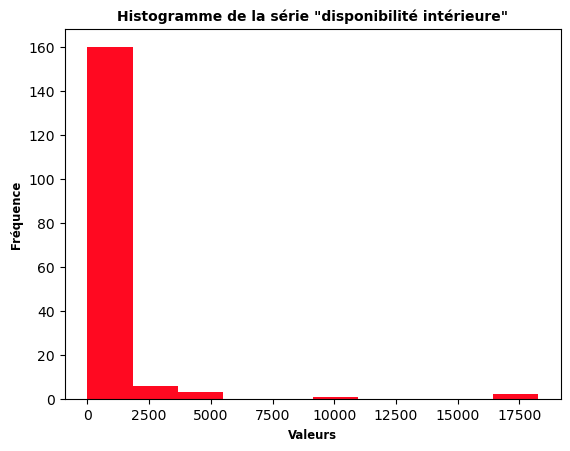

In [65]:
plt.hist(data['dispo_interieur*1000t'], bins=10, color='#ff0921')  
plt.xlabel('Valeurs', fontweight='bold', fontsize='small')
plt.ylabel('Fréquence', fontweight='bold',fontsize='small')
plt.title('Histogramme de la série "disponibilité intérieure"', fontweight='bold',fontsize='medium')
plt.show()

#### 4.1.2 - Exportation

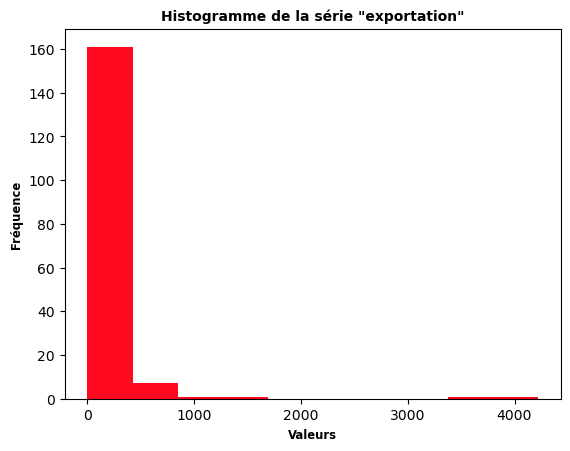

In [66]:
plt.hist(data['exportations*1000t'], bins=10, color='#ff0921')  
plt.xlabel('Valeurs', fontweight='bold', fontsize='small')
plt.ylabel('Fréquence', fontweight='bold',fontsize='small')
plt.title('Histogramme de la série "exportation"', fontweight='bold',fontsize='medium')
plt.show()

#### 4.1.3 - Importation

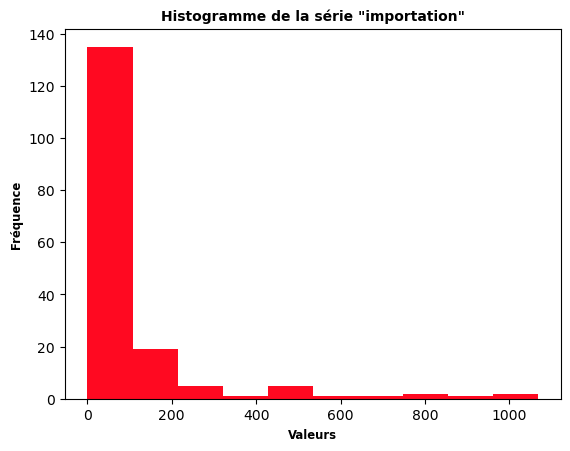

In [68]:
plt.hist(data['importations*1000t'], bins=10, color='#ff0921')  
plt.xlabel('Valeurs', fontweight='bold', fontsize='small')
plt.ylabel('Fréquence', fontweight='bold',fontsize='small')
plt.title('Histogramme de la série "importation"', fontweight='bold',fontsize='medium')
plt.show()

#### 4.1.4 - Production

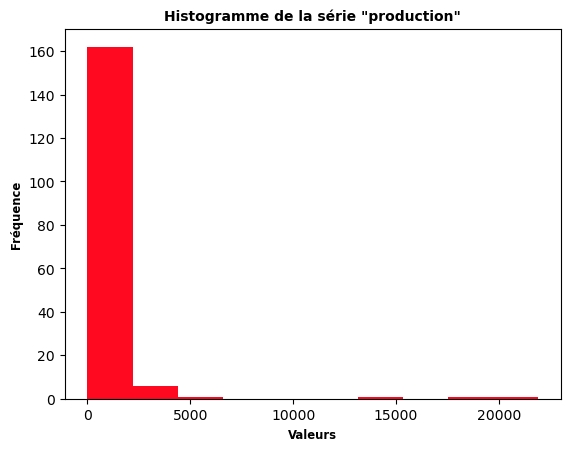

In [69]:
plt.hist(data['production*1000t'], bins=10, color='#ff0921')  
plt.xlabel('Valeurs', fontweight='bold', fontsize='small')
plt.ylabel('Fréquence', fontweight='bold',fontsize='small')
plt.title('Histogramme de la série "production"', fontweight='bold',fontsize='medium')
plt.show()

#### 4.1.5 - Variation de stock

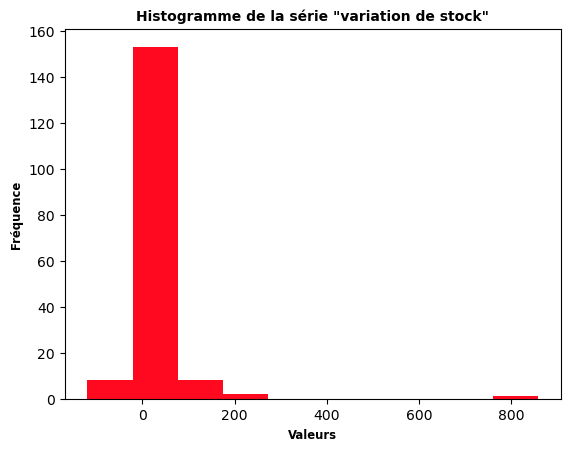

In [70]:
plt.hist(data['variation_stock*1000t'], bins=10, color='#ff0921')  
plt.xlabel('Valeurs', fontweight='bold', fontsize='small')
plt.ylabel('Fréquence', fontweight='bold',fontsize='small')
plt.title('Histogramme de la série "variation de stock"', fontweight='bold',fontsize='medium')
plt.show()

#### 4.1.6 - Population

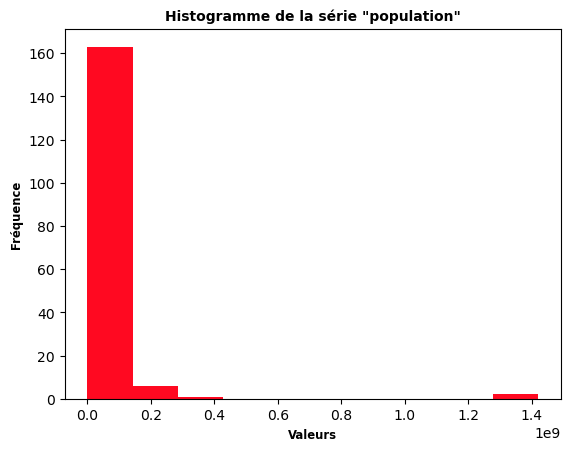

In [71]:
plt.hist(data['population'], bins=10, color='#ff0921')  
plt.xlabel('Valeurs', fontweight='bold', fontsize='small')
plt.ylabel('Fréquence', fontweight='bold',fontsize='small')
plt.title('Histogramme de la série "population"', fontweight='bold',fontsize='medium')
plt.show()

#### 4.1.7 - Disponibilité alimentaire 

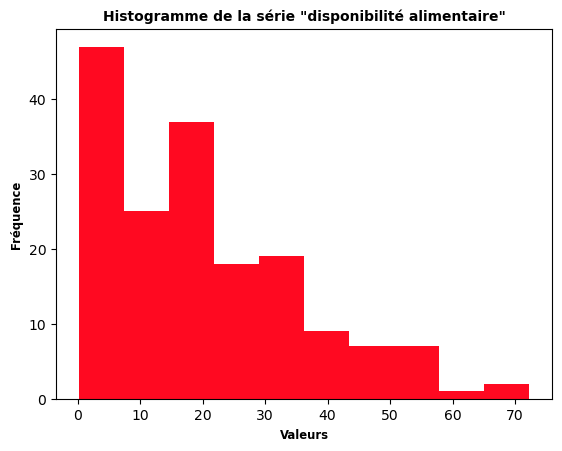

In [72]:
plt.hist(data['dispo_alim_(kg/personne/an)'], bins=10, color='#ff0921')  
plt.xlabel('Valeurs', fontweight='bold', fontsize='small')
plt.ylabel('Fréquence', fontweight='bold',fontsize='small')
plt.title('Histogramme de la série "disponibilité alimentaire"', fontweight='bold',fontsize='medium')
plt.show()

### 4.2 - Étudier les corrélations entre les variables

#### 4.2.1 - Calculer la matrice de corrélation

In [73]:
correlation_matrix = data.corr()

#### 4.2.2 - Créer un graphique de corrélation

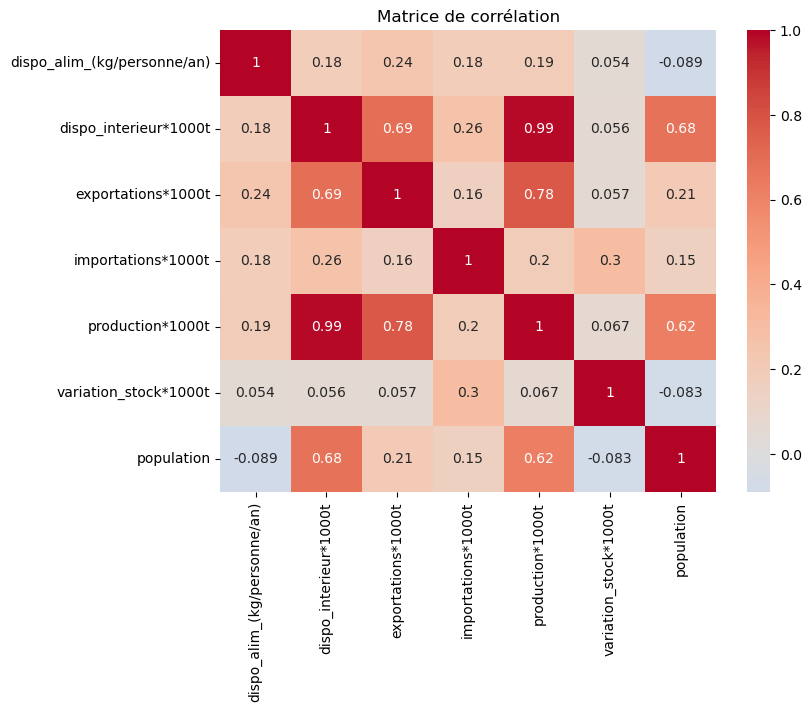

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()

### 4.3 - Réaliser une ACP

#### 4.3.1 - Scaler les données et les instancier

In [75]:
scaler = StandardScaler()

In [76]:
data_scaled = scaler.fit_transform(data)

#### 4.3.2 - Déterminer le nombre de composantes 

In [77]:
n_components = 7

#### 4.3.3 - Instancier l'ACP et l'entrainer sur les données scalées

In [78]:
pca = PCA(n_components=n_components)

In [79]:
pca.fit(data_scaled)

PCA(n_components=7)

#### 4.3.4 - Enregistrer dans une variable la variance de chaque nouvelle composante

In [80]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([45.14, 19.04, 14.8 , 10.82,  7.99,  2.21,  0.  ])

In [81]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 45.,  64.,  79.,  90.,  98., 100., 100.])

#### 4.3.5 - Définir une variable avec la liste des composantes 

In [82]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

#### 4.3.6 - Éboulis des valeurs propres

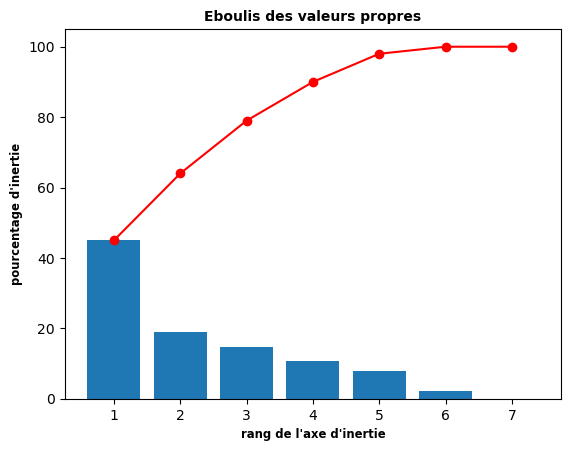

In [83]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie", fontweight='bold',fontsize='small')
plt.ylabel("pourcentage d'inertie", fontweight='bold',fontsize='small')
plt.title("Eboulis des valeurs propres", fontweight='bold',fontsize='medium')
plt.show(block=False)

#### 4.3.7 - Calcul des composantes 

In [84]:
pcs = pca.components_
pcs

array([[ 1.46256196e-01,  5.46897984e-01,  4.40147476e-01,
         1.96354048e-01,  5.49370222e-01,  5.96998916e-02,
         3.76636814e-01],
       [ 4.23901078e-01, -9.07546199e-02,  5.34323122e-02,
         5.42580048e-01, -9.18229898e-02,  6.23476753e-01,
        -3.43028616e-01],
       [-6.86276770e-01,  3.45261673e-02, -3.04268778e-01,
         3.36225932e-01, -3.87532833e-02,  4.12731561e-01,
         3.87757159e-01],
       [-3.50076474e-01,  1.20395942e-02,  4.04366693e-01,
        -5.52778725e-01,  1.42385519e-01,  5.11962742e-01,
        -3.54746788e-01],
       [-4.45605245e-01, -6.41608434e-02,  4.51794212e-01,
         4.95209223e-01, -2.24122286e-02, -4.11538958e-01,
        -4.22021973e-01],
       [ 8.26052274e-02, -5.10858401e-01,  5.69501084e-01,
        -9.93917702e-03, -3.40887400e-01,  7.34366680e-02,
         5.34951058e-01],
       [ 3.39067409e-06,  6.52867724e-01,  1.37381882e-01,
        -5.57568059e-02, -7.42481594e-01,  2.24101061e-02,
        -3.5459541

In [85]:
# Afficher la même chose dans un dataframe
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.146256,0.546898,0.440147,0.196354,0.549370,0.059700,0.376637
1,0.423901,-0.090755,0.053432,0.542580,-0.091823,0.623477,-0.343029
2,-0.686277,0.034526,-0.304269,0.336226,-0.038753,0.412732,0.387757
3,-0.350076,0.012040,0.404367,-0.552779,0.142386,0.511963,-0.354747
4,-0.445605,-0.064161,0.451794,0.495209,-0.022412,-0.411539,-0.422022
5,0.082605,-0.510858,0.569501,-0.009939,-0.340887,0.073437,0.534951
6,0.000003,0.652868,0.137382,-0.055757,-0.742482,0.022410,-0.000035


In [86]:
features = data.columns
features

Index(['dispo_alim_(kg/personne/an)', 'dispo_interieur*1000t',
       'exportations*1000t', 'importations*1000t', 'production*1000t',
       'variation_stock*1000t', 'population'],
      dtype='object')

In [87]:
# Ajouter les features pour plus de clareté 
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,dispo_alim_(kg/personne/an),dispo_interieur*1000t,exportations*1000t,importations*1000t,production*1000t,variation_stock*1000t,population
F1,0.15,0.55,0.44,0.20,0.55,0.06,0.38
F2,0.42,-0.09,0.05,0.54,-0.09,0.62,-0.34
F3,-0.69,0.03,-0.30,0.34,-0.04,0.41,0.39
F4,-0.35,0.01,0.40,-0.55,0.14,0.51,-0.35
F5,-0.45,-0.06,0.45,0.50,-0.02,-0.41,-0.42
F6,0.08,-0.51,0.57,-0.01,-0.34,0.07,0.53
F7,0.00,0.65,0.14,-0.06,-0.74,0.02,-0.00


In [88]:
# Autre manière d'afficher le DF
pcs.T

,F1,F2,F3,F4,F5,F6,F7
dispo_alim_(kg/personne/an),0.146256,0.423901,-0.686277,-0.350076,-0.445605,0.082605,0.000003
dispo_interieur*1000t,0.546898,-0.090755,0.034526,0.012040,-0.064161,-0.510858,0.652868
exportations*1000t,0.440147,0.053432,-0.304269,0.404367,0.451794,0.569501,0.137382
importations*1000t,0.196354,0.542580,0.336226,-0.552779,0.495209,-0.009939,-0.055757
production*1000t,0.549370,-0.091823,-0.038753,0.142386,-0.022412,-0.340887,-0.742482
variation_stock*1000t,0.059700,0.623477,0.412732,0.511963,-0.411539,0.073437,0.022410
population,0.376637,-0.343029,0.387757,-0.354747,-0.422022,0.534951,-0.000035


### 4.4 - Cercles des corrélations

#### 4.4.1 - Définir la focntion pour la réalisation des cercles de corrélations

In [89]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)), fontweight='bold',fontsize='small')
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)), fontweight='bold',fontsize='small')

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1), fontweight='bold',fontsize='medium')

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

#### 4.4.2 - Cercle des corrélations F1 et F2

In [90]:
x_y = (0,1)
x_y

(0, 1)

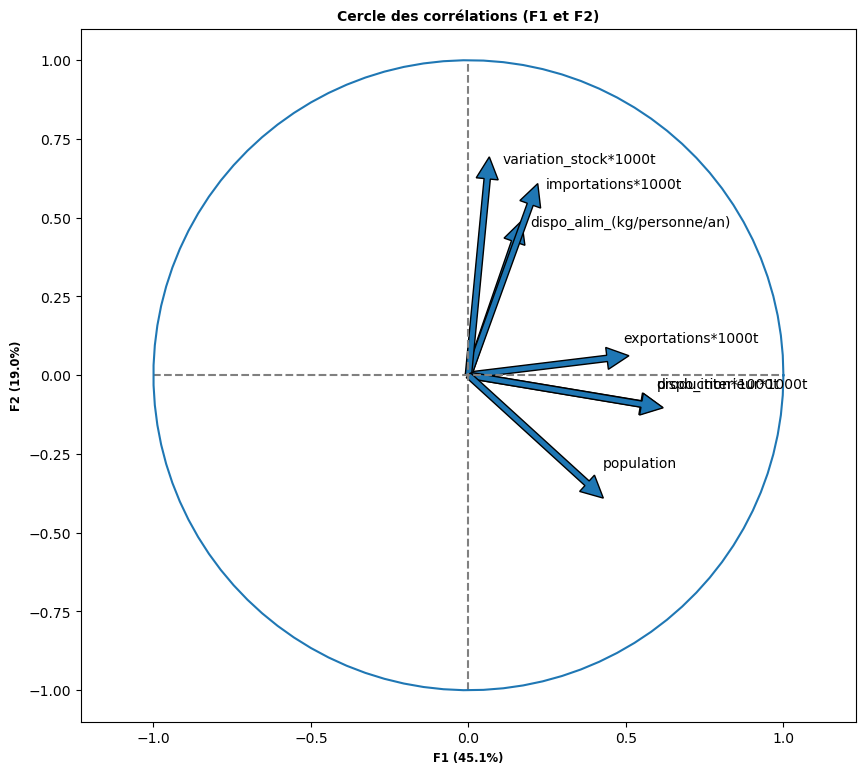

In [91]:
correlation_graph(pca, x_y, features)

#### 4.4.3 - Cercle des corrélations F3 et F4

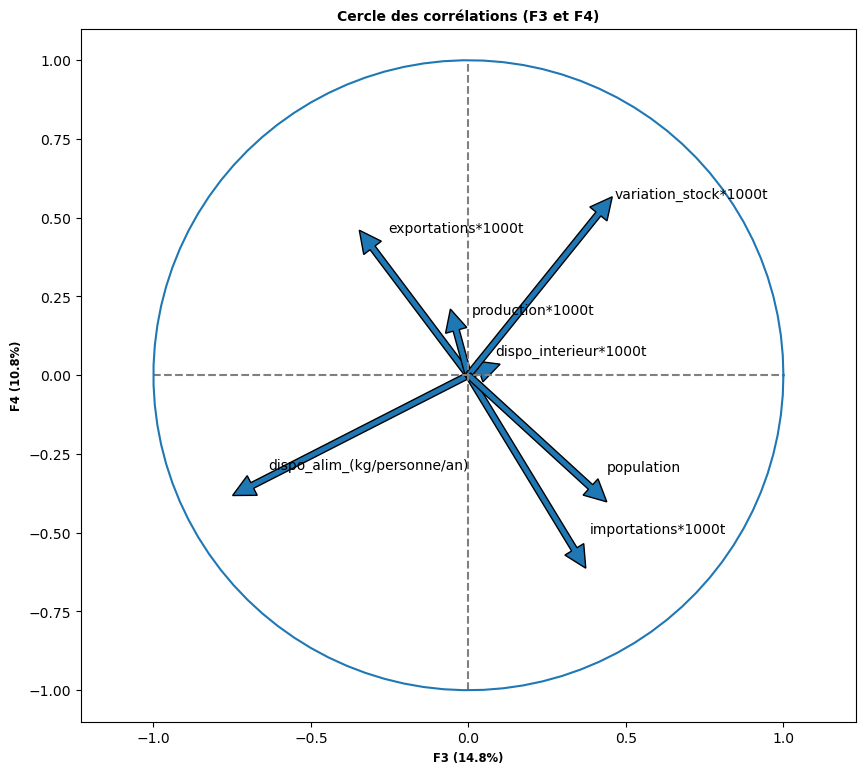

In [92]:
correlation_graph(pca, (2,3), features)

## 5 - Exportation des données en fichier CSV

In [93]:
data.to_csv('data.csv', index=True)
pcs.to_csv('pcs.csv', index=True)